In [2]:
!nvidia-smi

Mon Nov 10 16:14:47 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 555.99                 Driver Version: 555.99         CUDA Version: 12.5     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3050 ...  WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   50C    P8              7W /   75W |     181MiB /   6144MiB |      5%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost
import lightgbm
import warnings
warnings.filterwarnings("ignore")

In [4]:
import xgboost as xgb
print("Version:", xgb.__version__)

model = xgb.XGBClassifier(tree_method='hist',device='cuda')
model.fit([[0,1],[1,0]], [0,1])
print("✅ GPU training works!")

Version: 3.1.1
✅ GPU training works!


In [7]:
data1 = pd.read_excel(r"C:\Users\Aniket\OneDrive\Desktop\Personal\Projects\Credit lending\Project\case_study1.xlsx")
data2 = pd.read_excel(r"C:\Users\Aniket\OneDrive\Desktop\Personal\Projects\Credit lending\Project\case_study2.xlsx")

In [8]:
df1 = data1.copy()
df2 = data2.copy()

In [9]:
# overview of data

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51336 entries, 0 to 51335
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PROSPECTID            51336 non-null  int64  
 1   Total_TL              51336 non-null  int64  
 2   Tot_Closed_TL         51336 non-null  int64  
 3   Tot_Active_TL         51336 non-null  int64  
 4   Total_TL_opened_L6M   51336 non-null  int64  
 5   Tot_TL_closed_L6M     51336 non-null  int64  
 6   pct_tl_open_L6M       51336 non-null  float64
 7   pct_tl_closed_L6M     51336 non-null  float64
 8   pct_active_tl         51336 non-null  float64
 9   pct_closed_tl         51336 non-null  float64
 10  Total_TL_opened_L12M  51336 non-null  int64  
 11  Tot_TL_closed_L12M    51336 non-null  int64  
 12  pct_tl_open_L12M      51336 non-null  float64
 13  pct_tl_closed_L12M    51336 non-null  float64
 14  Tot_Missed_Pmnt       51336 non-null  int64  
 15  Auto_TL            

In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51336 entries, 0 to 51335
Data columns (total 62 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PROSPECTID                    51336 non-null  int64  
 1   time_since_recent_payment     51336 non-null  int64  
 2   time_since_first_deliquency   51336 non-null  int64  
 3   time_since_recent_deliquency  51336 non-null  int64  
 4   num_times_delinquent          51336 non-null  int64  
 5   max_delinquency_level         51336 non-null  int64  
 6   max_recent_level_of_deliq     51336 non-null  int64  
 7   num_deliq_6mts                51336 non-null  int64  
 8   num_deliq_12mts               51336 non-null  int64  
 9   num_deliq_6_12mts             51336 non-null  int64  
 10  max_deliq_6mts                51336 non-null  int64  
 11  max_deliq_12mts               51336 non-null  int64  
 12  num_times_30p_dpd             51336 non-null  int64  
 13  n

In [12]:
print(df1.shape)
df2.shape

(51336, 26)


(51336, 62)

In [13]:
# feature / variable overview

In [14]:
df2['Approved_Flag']

0        P2
1        P2
2        P2
3        P2
4        P1
         ..
51331    P4
51332    P1
51333    P3
51334    P2
51335    P2
Name: Approved_Flag, Length: 51336, dtype: object

will be here later

In [15]:
# Here we can see we do not have any null values. But we have lets see

In [16]:
df1[df1['Age_Oldest_TL'] == -99999]

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,...,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL
532,533,2,2,0,0,0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,2,0,2,-99999,-99999
804,805,1,0,1,0,0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,1,1,-99999,-99999
1179,1180,1,0,1,0,0,0.0,0.0,1.0,0.0,...,0,0,1,0,0,1,0,0,-99999,-99999
3299,3300,1,1,0,0,0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,1,1,-99999,-99999
5694,5695,1,0,1,0,0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,1,1,-99999,-99999
5951,5952,1,0,1,0,0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,1,1,-99999,-99999
9079,9080,1,0,1,0,0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,1,1,-99999,-99999
10003,10004,1,0,1,0,0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,1,1,-99999,-99999
10859,10860,1,0,1,0,0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,1,0,1,-99999,-99999
12017,12018,1,0,1,0,0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,1,1,-99999,-99999


In [17]:
# Here we have multiple -99999 values in our data ,this is the null value in our data set which is filled by -99999 number

In [18]:
# so what we will do either we will fill or remove the null values .
# But we will not fill values since i don;t have much domain knowledge i will drop the null values
# and if we have 40000 or greater than 40000 rows then we will go further if not we will try to fill the null values.

In [19]:
df1 = df1.loc[df1['Age_Oldest_TL'] != -99999]

In [20]:
for col in df1.columns:
    print(f'{col} --> {df1[df1[col] == -99999].shape[0]}')

PROSPECTID --> 0
Total_TL --> 0
Tot_Closed_TL --> 0
Tot_Active_TL --> 0
Total_TL_opened_L6M --> 0
Tot_TL_closed_L6M --> 0
pct_tl_open_L6M --> 0
pct_tl_closed_L6M --> 0
pct_active_tl --> 0
pct_closed_tl --> 0
Total_TL_opened_L12M --> 0
Tot_TL_closed_L12M --> 0
pct_tl_open_L12M --> 0
pct_tl_closed_L12M --> 0
Tot_Missed_Pmnt --> 0
Auto_TL --> 0
CC_TL --> 0
Consumer_TL --> 0
Gold_TL --> 0
Home_TL --> 0
PL_TL --> 0
Secured_TL --> 0
Unsecured_TL --> 0
Other_TL --> 0
Age_Oldest_TL --> 0
Age_Newest_TL --> 0


In [21]:
columns_to_drop = []

In [22]:
for col in df2.columns:
    print(f'{col} --> {df2[df2[col] == -99999].shape[0]}')
    if df2[df2[col] == -99999].shape[0] > 10000:
        columns_to_drop.append(col)

PROSPECTID --> 0
time_since_recent_payment --> 4291
time_since_first_deliquency --> 35949
time_since_recent_deliquency --> 35949
num_times_delinquent --> 0
max_delinquency_level --> 35949
max_recent_level_of_deliq --> 0
num_deliq_6mts --> 0
num_deliq_12mts --> 0
num_deliq_6_12mts --> 0
max_deliq_6mts --> 12890
max_deliq_12mts --> 10832
num_times_30p_dpd --> 0
num_times_60p_dpd --> 0
num_std --> 0
num_std_6mts --> 0
num_std_12mts --> 0
num_sub --> 0
num_sub_6mts --> 0
num_sub_12mts --> 0
num_dbt --> 0
num_dbt_6mts --> 0
num_dbt_12mts --> 0
num_lss --> 0
num_lss_6mts --> 0
num_lss_12mts --> 0
recent_level_of_deliq --> 0
tot_enq --> 6321
CC_enq --> 6321
CC_enq_L6m --> 6321
CC_enq_L12m --> 6321
PL_enq --> 6321
PL_enq_L6m --> 6321
PL_enq_L12m --> 6321
time_since_recent_enq --> 6321
enq_L12m --> 6321
enq_L6m --> 6321
enq_L3m --> 6321
MARITALSTATUS --> 0
EDUCATION --> 0
AGE --> 0
GENDER --> 0
NETMONTHLYINCOME --> 0
Time_With_Curr_Empr --> 0
pct_of_active_TLs_ever --> 0
pct_opened_TLs_L6m_of_L

In [23]:
columns_to_drop

['time_since_first_deliquency',
 'time_since_recent_deliquency',
 'max_delinquency_level',
 'max_deliq_6mts',
 'max_deliq_12mts',
 'CC_utilization',
 'PL_utilization',
 'max_unsec_exposure_inPct']

In [24]:
df2 = df2.drop(columns=columns_to_drop,axis=1)

In [25]:
df2.shape

(51336, 54)

In [26]:
for col in df2.columns:
    df2 = df2.loc[df2[col] != -99999]

In [27]:
df2.shape

(42066, 54)

In [28]:
df1.isnull().sum().sum()

np.int64(0)

In [29]:
df2.isnull().sum().sum()

np.int64(0)

In [30]:
# Now i droped all the null values and i will go further if we have more than 40000 rows so we have 42000 rows, so i will go without hesitating

In [31]:
for i in list(df1.columns):
    if i in list(df2.columns):
        print(i)

PROSPECTID


In [32]:
df = df1.merge(df2,on='PROSPECTID')
df.head()

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,...,pct_PL_enq_L6m_of_L12m,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Credit_Score,Approved_Flag
0,1,5,4,1,0,0,0.000,0.0,0.200,0.800,...,0.0,0.0,0.000,0.0,1,0,PL,PL,696,P2
1,2,1,0,1,0,0,0.000,0.0,1.000,0.000,...,0.0,0.0,0.000,0.0,0,0,ConsumerLoan,ConsumerLoan,685,P2
2,3,8,0,8,1,0,0.125,0.0,1.000,0.000,...,0.0,0.0,0.000,0.0,1,0,ConsumerLoan,others,693,P2
3,5,3,2,1,0,0,0.000,0.0,0.333,0.667,...,0.0,0.0,0.000,0.0,0,0,AL,AL,753,P1
4,6,6,5,1,0,0,0.000,0.0,0.167,0.833,...,1.0,0.0,0.429,0.0,1,0,ConsumerLoan,PL,668,P3


In [33]:
df.shape

(42064, 79)

In [34]:
df.isnull().sum().sum()

np.int64(0)

In [35]:
df['Approved_Flag']

0        P2
1        P2
2        P2
3        P1
4        P3
         ..
42059    P4
42060    P1
42061    P3
42062    P2
42063    P2
Name: Approved_Flag, Length: 42064, dtype: object

In [36]:
# check how many categorical columns we have

In [37]:
df.select_dtypes(include='O').columns.values

array(['MARITALSTATUS', 'EDUCATION', 'GENDER', 'last_prod_enq2',
       'first_prod_enq2', 'Approved_Flag'], dtype=object)

In [38]:
categorical_column = ['MARITALSTATUS', 'EDUCATION', 'GENDER', 'last_prod_enq2','first_prod_enq2']

In [39]:
for i in categorical_column:
    chi_,p_value,_,_ = chi2_contingency(pd.crosstab(df[i] , df['Approved_Flag']))
    print(f'{i} --> {p_value}')

MARITALSTATUS --> 3.578180861038862e-233
EDUCATION --> 2.6942265249737532e-30
GENDER --> 1.907936100186563e-05
last_prod_enq2 --> 0.0
first_prod_enq2 --> 7.84997610555419e-287


In [40]:
# All column have p_values less than 0.05 . we will accept all columns

In [41]:
numerical_column = []
for i in df.columns:
    if df[i].name not in (df.select_dtypes(include='O').columns):
        numerical_column.append(i)

In [42]:
numerical_column.remove('PROSPECTID')

In [43]:
numerical_column

['Total_TL',
 'Tot_Closed_TL',
 'Tot_Active_TL',
 'Total_TL_opened_L6M',
 'Tot_TL_closed_L6M',
 'pct_tl_open_L6M',
 'pct_tl_closed_L6M',
 'pct_active_tl',
 'pct_closed_tl',
 'Total_TL_opened_L12M',
 'Tot_TL_closed_L12M',
 'pct_tl_open_L12M',
 'pct_tl_closed_L12M',
 'Tot_Missed_Pmnt',
 'Auto_TL',
 'CC_TL',
 'Consumer_TL',
 'Gold_TL',
 'Home_TL',
 'PL_TL',
 'Secured_TL',
 'Unsecured_TL',
 'Other_TL',
 'Age_Oldest_TL',
 'Age_Newest_TL',
 'time_since_recent_payment',
 'num_times_delinquent',
 'max_recent_level_of_deliq',
 'num_deliq_6mts',
 'num_deliq_12mts',
 'num_deliq_6_12mts',
 'num_times_30p_dpd',
 'num_times_60p_dpd',
 'num_std',
 'num_std_6mts',
 'num_std_12mts',
 'num_sub',
 'num_sub_6mts',
 'num_sub_12mts',
 'num_dbt',
 'num_dbt_6mts',
 'num_dbt_12mts',
 'num_lss',
 'num_lss_6mts',
 'num_lss_12mts',
 'recent_level_of_deliq',
 'tot_enq',
 'CC_enq',
 'CC_enq_L6m',
 'CC_enq_L12m',
 'PL_enq',
 'PL_enq_L6m',
 'PL_enq_L12m',
 'time_since_recent_enq',
 'enq_L12m',
 'enq_L6m',
 'enq_L3m',

In [44]:
# Now we will check is multicolinearlity exist in our dataset or not.
# If exist then we will drop that columns

In [45]:
vif_data = df[numerical_column]
total_column = vif_data.shape[1]
columns_to_be_kept = []
column_index = 0

In [46]:
for i in range(0,total_column):
    vif_value = variance_inflation_factor(vif_data,column_index)
    print(column_index , '-----', vif_value)

    if vif_value <= 6:
        columns_to_be_kept.append(numerical_column[i])
        column_index += 1

    else:
        vif_data = vif_data.drop([ numerical_column[i] ],axis=1)

0 ----- inf
0 ----- inf
0 ----- 11.320180023967996
0 ----- 8.363698035000336
0 ----- 6.520647877790928
0 ----- 5.149501618212625
1 ----- 2.611111040579735
2 ----- inf
2 ----- 1788.7926256209232
2 ----- 8.601028256477228
2 ----- 3.8328007921530785
3 ----- 6.0996533816467355
3 ----- 5.5813520096427585
4 ----- 1.9855843530987785
5 ----- inf
5 ----- 4.809538302819343
6 ----- 23.270628983464636
6 ----- 30.595522588100053
6 ----- 4.384346405965583
7 ----- 3.0646584155234238
8 ----- 2.898639771299253
9 ----- 4.377876915347324
10 ----- 2.2078535836958433
11 ----- 4.916914200506864
12 ----- 5.214702030064725
13 ----- 3.3861625024231476
14 ----- 7.840583309478997
14 ----- 5.255034641721438
15 ----- inf
15 ----- 7.380634506427232
15 ----- 1.4210050015175733
16 ----- 8.083255010190323
16 ----- 1.6241227524040114
17 ----- 7.257811920140003
17 ----- 15.59624383268298
17 ----- 1.8258570471324314
18 ----- 1.5080839450032664
19 ----- 2.172088834824578
20 ----- 2.623397553527229
21 ----- 2.2959970812106

In [47]:
columns_to_be_kept

['pct_tl_open_L6M',
 'pct_tl_closed_L6M',
 'Tot_TL_closed_L12M',
 'pct_tl_closed_L12M',
 'Tot_Missed_Pmnt',
 'CC_TL',
 'Home_TL',
 'PL_TL',
 'Secured_TL',
 'Unsecured_TL',
 'Other_TL',
 'Age_Oldest_TL',
 'Age_Newest_TL',
 'time_since_recent_payment',
 'max_recent_level_of_deliq',
 'num_deliq_6_12mts',
 'num_times_60p_dpd',
 'num_std_12mts',
 'num_sub',
 'num_sub_6mts',
 'num_sub_12mts',
 'num_dbt',
 'num_dbt_12mts',
 'num_lss',
 'num_lss_12mts',
 'recent_level_of_deliq',
 'CC_enq_L12m',
 'PL_enq_L12m',
 'time_since_recent_enq',
 'enq_L3m',
 'NETMONTHLYINCOME',
 'Time_With_Curr_Empr',
 'pct_currentBal_all_TL',
 'CC_Flag',
 'PL_Flag',
 'pct_PL_enq_L6m_of_ever',
 'pct_CC_enq_L6m_of_ever',
 'HL_Flag',
 'GL_Flag']

In [48]:
columns_to_be_kept_numerical = []

for i in columns_to_be_kept:
    a = list(df[i])
    b = list(df['Approved_Flag'])

    group_p1 = [value for value,group in zip(a,b) if group == 'P1']
    group_p2 = [value for value,group in zip(a,b) if group == 'P2']
    group_p3 = [value for value,group in zip(a,b) if group == 'P3']
    group_p4 = [value for value,group in zip(a,b) if group == 'P4']

    f_stas,p_value = f_oneway(group_p1,group_p2,group_p3,group_p4)

    if p_value < 0.05:
        columns_to_be_kept_numerical.append(i)

In [49]:
columns_to_be_kept_numerical

['pct_tl_open_L6M',
 'pct_tl_closed_L6M',
 'Tot_TL_closed_L12M',
 'pct_tl_closed_L12M',
 'Tot_Missed_Pmnt',
 'CC_TL',
 'Home_TL',
 'PL_TL',
 'Secured_TL',
 'Unsecured_TL',
 'Other_TL',
 'Age_Oldest_TL',
 'Age_Newest_TL',
 'time_since_recent_payment',
 'max_recent_level_of_deliq',
 'num_deliq_6_12mts',
 'num_times_60p_dpd',
 'num_std_12mts',
 'num_sub',
 'num_sub_6mts',
 'num_sub_12mts',
 'num_dbt',
 'num_dbt_12mts',
 'num_lss',
 'recent_level_of_deliq',
 'CC_enq_L12m',
 'PL_enq_L12m',
 'time_since_recent_enq',
 'enq_L3m',
 'NETMONTHLYINCOME',
 'Time_With_Curr_Empr',
 'CC_Flag',
 'PL_Flag',
 'pct_PL_enq_L6m_of_ever',
 'pct_CC_enq_L6m_of_ever',
 'HL_Flag',
 'GL_Flag']

In [50]:
features = columns_to_be_kept_numerical + ['MARITALSTATUS', 'EDUCATION', 'GENDER', 'last_prod_enq2','first_prod_enq2']
df = df[features + ['Approved_Flag']]

In [51]:
# Label encoding for categorical columns

In [52]:
df['Approved_Flag']

0        P2
1        P2
2        P2
3        P1
4        P3
         ..
42059    P4
42060    P1
42061    P3
42062    P2
42063    P2
Name: Approved_Flag, Length: 42064, dtype: object

In [53]:
df['EDUCATION'].unique()

array(['12TH', 'GRADUATE', 'SSC', 'POST-GRADUATE', 'UNDER GRADUATE',
       'OTHERS', 'PROFESSIONAL'], dtype=object)

In [54]:
df['Approved_Flag'].value_counts()

Approved_Flag
P2    25452
P3     6440
P4     5264
P1     4908
Name: count, dtype: int64

In [55]:
# ssc --> 1
# 12th and others --> 2
# Graduate and undergraduate --> 3
# Post graduate --> 4
# professional --> 3
# others has to be verified by business end user

In [56]:
df.loc[df['EDUCATION'] == '12TH', 'EDUCATION'] = 2
df.loc[df['EDUCATION'] == 'GRADUATE', 'EDUCATION'] = 3
df.loc[df['EDUCATION'] == 'SSC', 'EDUCATION'] = 1
df.loc[df['EDUCATION'] == 'POST-GRADUATE', 'EDUCATION'] = 4
df.loc[df['EDUCATION'] == 'UNDER GRADUATE', 'EDUCATION'] = 3
df.loc[df['EDUCATION'] == 'OTHERS', 'EDUCATION'] = 1
df.loc[df['EDUCATION'] == 'PROFESSIONAL', 'EDUCATION'] = 3

In [57]:
df['Approved_Flag'].value_counts()

Approved_Flag
P2    25452
P3     6440
P4     5264
P1     4908
Name: count, dtype: int64

In [58]:
df['EDUCATION'].value_counts()

EDUCATION
3    18931
2    11703
1     9532
4     1898
Name: count, dtype: int64

In [59]:
df['EDUCATION'] = df['EDUCATION'].astype('int')

In [60]:
df['EDUCATION'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 42064 entries, 0 to 42063
Series name: EDUCATION
Non-Null Count  Dtype
--------------  -----
42064 non-null  int64
dtypes: int64(1)
memory usage: 328.8 KB


In [61]:
df['Approved_Flag']

0        P2
1        P2
2        P2
3        P1
4        P3
         ..
42059    P4
42060    P1
42061    P3
42062    P2
42063    P2
Name: Approved_Flag, Length: 42064, dtype: object

In [62]:
df_encoded = pd.get_dummies(df,columns=['MARITALSTATUS', 'GENDER', 'last_prod_enq2','first_prod_enq2'])

In [63]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42064 entries, 0 to 42063
Data columns (total 55 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   pct_tl_open_L6M               42064 non-null  float64
 1   pct_tl_closed_L6M             42064 non-null  float64
 2   Tot_TL_closed_L12M            42064 non-null  int64  
 3   pct_tl_closed_L12M            42064 non-null  float64
 4   Tot_Missed_Pmnt               42064 non-null  int64  
 5   CC_TL                         42064 non-null  int64  
 6   Home_TL                       42064 non-null  int64  
 7   PL_TL                         42064 non-null  int64  
 8   Secured_TL                    42064 non-null  int64  
 9   Unsecured_TL                  42064 non-null  int64  
 10  Other_TL                      42064 non-null  int64  
 11  Age_Oldest_TL                 42064 non-null  int64  
 12  Age_Newest_TL                 42064 non-null  int64  
 13  t

In [64]:
df_encoded.describe().T

,count,mean,std,min,25%,50%,75%,max
pct_tl_open_L6M,42064.0,0.179032,0.278043,0.0,0.0,0.0,0.333,1.0
pct_tl_closed_L6M,42064.0,0.097783,0.210957,0.0,0.0,0.0,0.100,1.0
Tot_TL_closed_L12M,42064.0,0.825504,1.537208,0.0,0.0,0.0,1.000,33.0
pct_tl_closed_L12M,42064.0,0.160365,0.258831,0.0,0.0,0.0,0.250,1.0
Tot_Missed_Pmnt,42064.0,0.525746,1.106442,0.0,0.0,0.0,1.000,34.0
CC_TL,42064.0,0.145921,0.549314,0.0,0.0,0.0,0.000,27.0
Home_TL,42064.0,0.076241,0.358582,0.0,0.0,0.0,0.000,10.0
PL_TL,42064.0,0.328000,0.916368,0.0,0.0,0.0,0.000,29.0
Secured_TL,42064.0,2.921334,6.379764,0.0,0.0,1.0,3.000,235.0
Unsecured_TL,42064.0,2.341646,3.405397,0.0,0.0,1.0,3.000,55.0


In [65]:
df_encoded.head().T

,0,1,2,3,4
pct_tl_open_L6M,0.0,0.0,0.125,0.0,0.0
pct_tl_closed_L6M,0.0,0.0,0.0,0.0,0.0
Tot_TL_closed_L12M,0,0,0,0,1
pct_tl_closed_L12M,0.0,0.0,0.0,0.0,0.167
Tot_Missed_Pmnt,0,0,1,0,0
CC_TL,0,0,0,0,0
Home_TL,0,0,0,0,0
PL_TL,4,0,0,0,0
Secured_TL,1,0,2,3,6
Unsecured_TL,4,1,6,0,0


In [66]:
# Data Preprocessing

In [67]:
y = df_encoded['Approved_Flag']
x = df_encoded.drop(['Approved_Flag'],axis=1)

In [68]:
x_train,x_test,y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [69]:
# Model Training

In [70]:
# 1. Random forest

rfc = RandomForestClassifier(n_estimators=200,random_state=42)
rfc.fit(x_train,y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [71]:
from sklearn.metrics import accuracy_score, classification_report

In [72]:
y_pred = rfc.predict(x_test)

In [73]:
accuracy_score(y_pred,y_test)

0.7636990372043266

In [74]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

          P1       0.70      0.84      0.76       853
          P2       0.93      0.80      0.86      5885
          P3       0.21      0.44      0.29       633
          P4       0.73      0.72      0.72      1042

    accuracy                           0.76      8413
   macro avg       0.64      0.70      0.66      8413
weighted avg       0.83      0.76      0.79      8413



In [75]:
# xgboost

In [76]:
y_xgb = df_encoded['Approved_Flag']
x_xgb = df_encoded.drop(['Approved_Flag'],axis=1)

In [77]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_xgb)

In [78]:
x_train_xgb,x_test_xgb,y_train_xgb,y_test_xgb = train_test_split(x_xgb,y_encoded,random_state=42,test_size=0.2)

In [79]:
xgb_classifier = xgboost.XGBClassifier(objective='multi:soft_max',num_class=4,tree_method='hist',device='cuda' )

In [80]:
xgb_classifier.fit(x_train_xgb,y_train_xgb)

,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,'cuda'
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [81]:
y_pred_xgb = xgb_classifier.predict(x_test)

In [82]:
accuracy_score(y_pred_xgb,y_test_xgb)

0.7748722215618685

In [83]:
print(classification_report(y_pred_xgb,y_test_xgb))

              precision    recall  f1-score   support

           0       0.75      0.82      0.78       933
           1       0.91      0.82      0.87      5601
           2       0.30      0.46      0.36       854
           3       0.74      0.74      0.74      1025

    accuracy                           0.77      8413
   macro avg       0.67      0.71      0.69      8413
weighted avg       0.81      0.77      0.79      8413



In [84]:
# Decision tree

In [85]:
dt_classifier = DecisionTreeClassifier(max_depth=20,min_samples_split=10)


In [86]:
dt_classifier.fit(x_train,y_train)
y_pred_dt = dt_classifier.predict(x_test)

In [87]:
accuracy_score(y_pred_dt,y_test)

0.7096160703672887

In [88]:
print(classification_report(y_pred_dt,y_test))

              precision    recall  f1-score   support

          P1       0.73      0.72      0.72      1028
          P2       0.82      0.81      0.82      5135
          P3       0.33      0.34      0.34      1267
          P4       0.62      0.65      0.64       983

    accuracy                           0.71      8413
   macro avg       0.63      0.63      0.63      8413
weighted avg       0.71      0.71      0.71      8413



In [89]:
# Xgboost give highest accuracy among 3, so we will choose xgboost to fine tune further

In [90]:
# hyperparameter tuning
# for tuning we will use Random search cv

In [91]:
# In video tutorial after doing hyperparameter tuning they get this result of accuracy of 78%
# Parameter used by tutor for hyperparameter tuning
# param_grid = {
#     'colsample_bytree':[0.1,0.3,0.5,0.7,0.9],
#     'learning_rate':[0.001,0.01,0.1,1],
#     'max_depth':[3,5,8,10],
#     'alpha': [0, 1, 5],
#     'n_estimators':[10,50,100]
# }
# Best parameter:  {'alpha': 0, 'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
# Best accuracy:  0.7789070161362218
# I tried this parameter to tune on colab notebook and this is the best parameter and score
y_xgb = df_encoded['Approved_Flag']
x_xgb = df_encoded.drop(['Approved_Flag'],axis=1)
label_encoder = LabelEncoder()
x_train_xgb,x_test_xgb,y_train_xgb,y_test_xgb = train_test_split(x_xgb,y_encoded,random_state=42,test_size=0.2)
y_encoded = label_encoder.fit_transform(y_xgb)
xgb_classifier_cv = xgboost.XGBClassifier(objective='multi:soft_max',num_class=4,
                                          alpha=10,colsample_bytree=0.9,learning_rate=1
                                          ,max_depth=3,n_estimators=100,tree_method='hist',
                                          device='cuda' )
xgb_classifier_cv.fit(x_train_xgb,y_train_xgb)
print("Accurcay on test : ",accuracy_score(xgb_classifier_cv.predict(x_test_xgb),y_test_xgb))
print("Accurcay on train : ",accuracy_score(xgb_classifier_cv.predict(x_train_xgb),y_train_xgb))
print("Classification report on train : \n",classification_report(xgb_classifier_cv.predict(x_train_xgb),y_train_xgb))
print("Classification report on test : \n",classification_report(xgb_classifier_cv.predict(x_test_xgb),y_test_xgb))

Accurcay on test :  0.7801022227505052
Accurcay on train :  0.8149534932097114
Classification report on train : 
               precision    recall  f1-score   support

           0       0.82      0.86      0.84      3734
           1       0.94      0.84      0.89     22600
           2       0.37      0.57      0.45      3254
           3       0.77      0.81      0.79      4063

    accuracy                           0.81     33651
   macro avg       0.72      0.77      0.74     33651
weighted avg       0.85      0.81      0.83     33651

Classification report on test : 
               precision    recall  f1-score   support

           0       0.78      0.84      0.81       939
           1       0.92      0.83      0.87      5616
           2       0.29      0.46      0.36       834
           3       0.73      0.73      0.73      1024

    accuracy                           0.78      8413
   macro avg       0.68      0.72      0.69      8413
weighted avg       0.82      0.78    

In [89]:
# Now my goal is to maixmize the accuracy score

In [90]:
lgbm = lightgbm.LGBMClassifier(
    device='gpu',
    boosting_type='gbdt',
    num_leaves=31,
    learning_rate=0.05,
    n_estimators=200
)

In [91]:
lgbm.fit(x_train,y_train)

[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 3028
[LightGBM] [Info] Number of data points in the train set: 33651, number of used features: 54
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3050 6GB Laptop GPU, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 16 dense feature groups (0.51 MB) transferred to GPU in 0.005942 secs. 1 sparse feature groups
[LightGBM] [Info] Start training from score -2.156606
[LightGBM] [Info] Start training from score -0.500165
[LightGBM] [Info] Start training from score -1.883865
[LightGBM] [Info] Start training from score -2.072659


,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.05
,n_estimators,200
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [92]:
accuracy_score(lgbm.predict(x_test),y_test)

0.7795079044336146

In [93]:
print(classification_report(lgbm.predict(x_test),y_test))

              precision    recall  f1-score   support

          P1       0.78      0.83      0.80       950
          P2       0.92      0.82      0.87      5619
          P3       0.28      0.46      0.35       813
          P4       0.74      0.74      0.74      1031

    accuracy                           0.78      8413
   macro avg       0.68      0.71      0.69      8413
weighted avg       0.82      0.78      0.80      8413



In [94]:
print("Accurcay on test : ",accuracy_score(lgbm.predict(x_test),y_test))
print("Accurcay on train : ",accuracy_score(lgbm.predict(x_train),y_train))
print("Classification report on train : \n",classification_report(lgbm.predict(x_train),y_train))
print("Classification report on test : \n",classification_report(lgbm.predict(x_test),y_test))

Accurcay on test :  0.7795079044336146
Accurcay on train :  0.8480877239903718
Classification report on train : 
               precision    recall  f1-score   support

          P1       0.86      0.89      0.88      3784
          P2       0.95      0.86      0.90     22489
          P3       0.44      0.68      0.54      3300
          P4       0.83      0.86      0.85      4078

    accuracy                           0.85     33651
   macro avg       0.77      0.82      0.79     33651
weighted avg       0.88      0.85      0.86     33651

Classification report on test : 
               precision    recall  f1-score   support

          P1       0.78      0.83      0.80       950
          P2       0.92      0.82      0.87      5619
          P3       0.28      0.46      0.35       813
          P4       0.74      0.74      0.74      1031

    accuracy                           0.78      8413
   macro avg       0.68      0.71      0.69      8413
weighted avg       0.82      0.78    

In [95]:
param_dist = {
    'num_leaves': [31, 63, 127],
    'max_depth': [-1, 7, 12],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [200, 500, 1000],
    'subsample': [0.7, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.9, 1.0],
    'reg_lambda': [0, 1, 5],
    'reg_alpha': [0, 1, 5]
}


In [96]:
cv = RandomizedSearchCV(
    estimator=lgbm,
    param_distributions=param_dist,
    n_iter=40,
    cv=3,
    scoring='accuracy',
    verbose=2,
    # n_jobs=-1,
    random_state=42
)
cv.fit(x_train,y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 2823
[LightGBM] [Info] Number of data points in the train set: 22434, number of used features: 53
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3050 6GB Laptop GPU, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 16 dense feature groups (0.34 MB) transferred to GPU in 0.002843 secs. 1 sparse feature groups
[LightGBM] [Info] Start training from score -2.156606
[LightGBM] [Info] Start training from score -0.500214
[LightGBM] [Info] Start training from score -1.883865
[LightGBM] [Info] Start training from score -2.072423
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furthe


KeyboardInterrupt



In [ ]:
print('Test accuracy :',accuracy_score(lgbm.predict(x_test),y_test))
print('Train accuracy :',accuracy_score(lgbm.predict(x_train),y_train))

In [97]:
lgbm = lightgbm.LGBMClassifier(
    device='gpu',
    boosting_type='gbdt',
    num_leaves=31,
    max_depth= -1,
    learning_rate=0.01,
    n_estimators=1000,
    subsample=0.9,
    colsample_bytree=0.7,
    reg_lambda=5,
    reg_alpha=0
    
)
lgbm.fit(x_train,y_train)

[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 3028
[LightGBM] [Info] Number of data points in the train set: 33651, number of used features: 54
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3050 6GB Laptop GPU, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 16 dense feature groups (0.51 MB) transferred to GPU in 0.003962 secs. 1 sparse feature groups
[LightGBM] [Info] Start training from score -2.156606
[LightGBM] [Info] Start training from score -0.500165
[LightGBM] [Info] Start training from score -1.883865
[LightGBM] [Info] Start training from score -2.072659


,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.01
,n_estimators,1000
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [98]:
print("Accurcay on test : ",accuracy_score(lgbm.predict(x_test),y_test))
print("Accurcay on train : ",accuracy_score(lgbm.predict(x_train),y_train))
print("Classification report on train : \n",classification_report(lgbm.predict(x_train),y_train))
print("Classification report on test : \n",classification_report(lgbm.predict(x_test),y_test))

Accurcay on test :  0.7815285867110424
Accurcay on train :  0.8332887581349737
Classification report on train : 
               precision    recall  f1-score   support

          P1       0.85      0.88      0.86      3769
          P2       0.94      0.85      0.90     22566
          P3       0.39      0.63      0.49      3182
          P4       0.81      0.83      0.82      4134

    accuracy                           0.83     33651
   macro avg       0.75      0.80      0.77     33651
weighted avg       0.87      0.83      0.85     33651

Classification report on test : 
               precision    recall  f1-score   support

          P1       0.77      0.83      0.80       941
          P2       0.92      0.82      0.87      5622
          P3       0.29      0.47      0.36       806
          P4       0.75      0.74      0.75      1044

    accuracy                           0.78      8413
   macro avg       0.68      0.72      0.69      8413
weighted avg       0.82      0.78    

In [ ]:
random_search = RandomizedSearchCV(
    estimator=lgbm,
    param_distributions=param_dist,
    # n_iter=30,               # ✅ only 30 smart tries
    scoring='accuracy',      # change to f1_macro if imbalanced
    cv=3,                    # 3-fold CV is enough
    verbose=2,
    random_state=42,
    # n_jobs=-1               # use all CPU cores
)

random_search.fit(x_train, y_train)

# Best result
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

In [ ]:
# tried on colab notebook
# Best Parameters: {'subsample': 0.9, 'reg_lambda': 5, 'reg_alpha': 0, 'num_leaves': 127, 'n_estimators': 1000, 'max_depth': 7, 'learning_rate': 0.01, 'colsample_bytree': 0.7}
# Best Score: 0.7787287153427833
# Best Parameters: {'subsample': 0.7, 'reg_lambda': 1, 'reg_alpha': 0, 'num_leaves': 31, 'n_estimators': 200, 'max_depth': -1, 'learning_rate': 0.05, 'colsample_bytree': 0.9}
# Best Score: 0.7797985201034144
# ✅ Best LGBM Parameters: {'subsample': 0.8, 'reg_lambda': 5, 'reg_alpha': 1, 'num_leaves': 20, 'n_estimators': 700, 'min_child_samples': 20, 'max_depth': 8, 'learning_rate': 0.02, 'colsample_bytree': 0.7}

# ✅ LGBM Train Accuracy: 0.824076550473983
# ✅ LGBM Test Accuracy: 0.782241768691311


In [94]:
# xgboost

In [97]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report

xgb_model = xgb.XGBClassifier(
    objective='multi:softprob',
    num_class=4,
    tree_method='hist',
    device='cuda'
)

param_dist_xgb = {
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [200, 400, 600],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.3, 0.5, 0.7],
    'reg_lambda': [1, 3, 5],
    'reg_alpha': [0, 1, 3],
    'min_child_weight': [1, 5, 10],
    'gamma': [0, 0.1, 0.2]
}

xgb_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist_xgb,
    n_iter=40,
    cv=5,
    scoring='accuracy',
    verbose=2,
    # n_jobs=-1,
    random_state=42
)

# Fit
xgb_search.fit(x_train_xgb, y_train_xgb)

print("\n✅ Best XGBoost Parameters:", xgb_search.best_params_)

# Predict
xgb_pred_train = xgb_search.predict(x_train_xgb)
xgb_pred_test = xgb_search.predict(x_test_xgb)

print("\n✅ XGB Train Accuracy:", accuracy_score(y_train_xgb, xgb_pred_train))
print("✅ XGB Test Accuracy:", accuracy_score(y_test_xgb, xgb_pred_test))

print("\n📄 Classification Report (Train):\n", classification_report(y_train_xgb, xgb_pred_train))
print("📄 Classification Report (Test):\n", classification_report(y_test_xgb, xgb_pred_test))


Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   3.0s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   2.6s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   2.5s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   2.6s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.05, max_de

In [ ]:
lgbm_final = lightgbm.LGBMClassifier(
    objective='multiclass',
    num_class=4,
    device='gpu',
    boosting_type='goss',
    class_weight='balanced',
    num_leaves=31,
    max_depth=8,
    learning_rate=0.015,
    n_estimators=500,
    subsample=0.7,
    colsample_bytree=0.6,
    feature_fraction=0.6,
    reg_lambda=3,
    reg_alpha=1,
    min_child_samples=30,
    min_split_gain=0.1
)


In [91]:
lgbm_final.fit(x_train, y_train)
pred_test = lgbm_final.predict(x_test)
pred_train = lgbm_final.predict(x_train)


[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 3021
[LightGBM] [Info] Number of data points in the train set: 33651, number of used features: 53
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3050 6GB Laptop GPU, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 b

In [94]:
print("Train accuracy: ",accuracy_score(pred_train,y_train))
print("Test accuracy: ",accuracy_score(pred_test,y_test))

Train accuracy:  0.7646726694600458
Test accuracy:  0.7210269820515869


In [103]:
lgbm = lightgbm.LGBMClassifier(
    device='gpu',

    # --- Tree Shape ---
    num_leaves=90,          # more learned patterns
    max_depth=12,           # deeper than default but not too deep

    # --- Learning Control ---
    learning_rate=0.03,     # faster than 0.01 but still stable
    n_estimators=1200,       # more trees = smoother decision boundaries

    # --- Regularization ---
    reg_alpha=1,            # light L1
    reg_lambda=3,           # moderate L2

    # --- Feature/Subsample ---
    feature_fraction=0.8,   # robust for noisy datasets
    bagging_fraction=0.8,
    bagging_freq=5,

    # --- Class-specific improvement ---
    min_data_in_leaf=60,    # reduces noise and improves P3 class
)


In [104]:
lgbm.fit(x_train, y_train)
print('Test accuracy :',accuracy_score(lgbm.predict(x_test),y_test))
print('Train accuracy :',accuracy_score(lgbm.predict(x_train),y_train))


[LightGBM] [Warning] min_data_in_leaf is set=60, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=60
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=60, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=60
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [In

In [ ]:
# catboost

In [105]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(
    iterations=300,
    task_type="GPU",
    devices='0',
    learning_rate=0.1,
    depth=6,
    loss_function='MultiClass',
    eval_metric='Accuracy',
    verbose=False
)

model.fit(x_train, y_train)
print("Train accuracy: ",accuracy_score(model.predict(x_train),y_train))
print("Test accuracy: ",accuracy_score(model.predict(x_test),y_test))

Train accuracy:  0.8083266470535794
Test accuracy:  0.7828360870082016


In [98]:
# Catboost base model gives almost same result after tunning xgboost and lightbgm means there could be a chance that 
# after tuning catboost out performe xgboost and lightgbm

In [100]:
param_grid_cat = {
    'depth': [6, 8, 10],
    'learning_rate': [0.03, 0.06, 0.1],
    'iterations': [500, 800, 1000],
    'l2_leaf_reg': [1, 3, 5],
    'bagging_temperature': [0, 0.5, 1]
}

In [105]:
cat_cv = GridSearchCV(estimator=model,param_grid=param_grid_cat,cv=2,scoring='accuracy',verbose=2)

In [106]:
cat_cv.fit(x_train,y_train)

Fitting 2 folds for each of 243 candidates, totalling 486 fits
[CV] END bagging_temperature=0, depth=6, iterations=500, l2_leaf_reg=1, learning_rate=0.03; total time=   7.6s
[CV] END bagging_temperature=0, depth=6, iterations=500, l2_leaf_reg=1, learning_rate=0.03; total time=   7.5s
[CV] END bagging_temperature=0, depth=6, iterations=500, l2_leaf_reg=1, learning_rate=0.06; total time=   6.7s
[CV] END bagging_temperature=0, depth=6, iterations=500, l2_leaf_reg=1, learning_rate=0.06; total time=   6.6s
[CV] END bagging_temperature=0, depth=6, iterations=500, l2_leaf_reg=1, learning_rate=0.1; total time=   7.1s
[CV] END bagging_temperature=0, depth=6, iterations=500, l2_leaf_reg=1, learning_rate=0.1; total time=   6.5s
[CV] END bagging_temperature=0, depth=6, iterations=500, l2_leaf_reg=3, learning_rate=0.03; total time=   6.5s
[CV] END bagging_temperature=0, depth=6, iterations=500, l2_leaf_reg=3, learning_rate=0.03; total time=   7.1s
[CV] END bagging_temperature=0, depth=6, iterations

,estimator,<catboost.cor...00183B51B9BE0>
,param_grid,"{'bagging_temperature': [0, 0.5, ...], 'depth': [6, 8, ...], 'iterations': [500, 800, ...], 'l2_leaf_reg': [1, 3, ...], ...}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,2
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False


In [108]:
print('Best parameter: ',cat_cv.best_params_)
print('Best accuracy: ',cat_cv.best_score_)

Best parameter:  {'bagging_temperature': 1, 'depth': 6, 'iterations': 500, 'l2_leaf_reg': 1, 'learning_rate': 0.03}
Best accuracy:  0.7835726390329549


In [6]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(
    task_type="GPU",
    devices='0',
    bagging_temperature= 1,
    depth = 6,
    iterations =  500,
    l2_leaf_reg = 1,
    learning_rate = 0.03,
    verbose=False
)

model.fit(x_train, y_train)
print("Train accuracy: ",accuracy_score(model.predict(x_train),y_train))
print("Test accuracy: ",accuracy_score(model.predict(x_test),y_test))

NameError: name 'x_train' is not defined

In [ ]:
print("Train accuracy: ",accuracy_score(model.predict(x_train),y_train))
print("Test accuracy: ",accuracy_score(model.predict(x_test),y_test))
print("Classification report on train data\n",classification_report(model.predict(x_train),y_train))
print("Classification report on test data\n",classification_report(model.predict(x_test),y_test))

#### Interpretation

In [95]:
# catboost is generalizing well compared to xgboost and lightgbm

In [112]:
features = []
importance = []

In [113]:
from catboost import CatBoostClassifier, Pool
import matplotlib.pyplot as plt

model_ = model  # your trained model
feature_importances = model_.get_feature_importance()

for name, score in zip(x_train.columns, feature_importances):
    print(f"{name} : {score}")
    features.append({"feature":name})
    importance.append({"importance":score})

pct_tl_open_L6M : 0.46455810151430327
pct_tl_closed_L6M : 0.0971001397770839
Tot_TL_closed_L12M : 0.03592210081603227
pct_tl_closed_L12M : 0.20797878432127428
Tot_Missed_Pmnt : 0.12075839244464176
CC_TL : 0.004905686259036478
Home_TL : 0.020085310386162975
PL_TL : 0.009787532552186274
Secured_TL : 0.45625392356566247
Unsecured_TL : 0.3463941944977098
Other_TL : 0.19289524660888704
Age_Oldest_TL : 22.572514639531637
Age_Newest_TL : 3.007029201071869
time_since_recent_payment : 1.5469183277651484
max_recent_level_of_deliq : 13.436081665494578
num_deliq_6_12mts : 2.648962625869032
num_times_60p_dpd : 1.3632122803656501
num_std_12mts : 10.927843697372564
num_sub : 0.010680090322304653
num_sub_6mts : 0.0012928003157873771
num_sub_12mts : 0.00010662278972410094
num_dbt : 0.001867180548849496
num_dbt_12mts : 0.0005480419400564255
num_lss : 0.002265510963605263
recent_level_of_deliq : 4.543098814312452
CC_enq_L12m : 0.04141881530157753
PL_enq_L12m : 0.2950682513576474
time_since_recent_enq : 9

In [122]:
feature_imp = pd.concat([pd.DataFrame(features),pd.DataFrame(importance)],axis=1)

In [125]:
top_five_feature = feature_imp.sort_values(by='importance',ascending=False).head()
top_five_feature

,feature,importance
11,Age_Oldest_TL,22.572515
28,enq_L3m,20.492294
14,max_recent_level_of_deliq,13.436082
17,num_std_12mts,10.927844
27,time_since_recent_enq,9.524672


In [126]:
less_imp_five_feature = feature_imp.sort_values(by='importance',ascending=True).head()
less_imp_five_feature

,feature,importance
41,GENDER_M,0.0
43,last_prod_enq2_CC,0.0
39,MARITALSTATUS_Single,0.0
51,first_prod_enq2_HL,0.0
32,PL_Flag,0.0


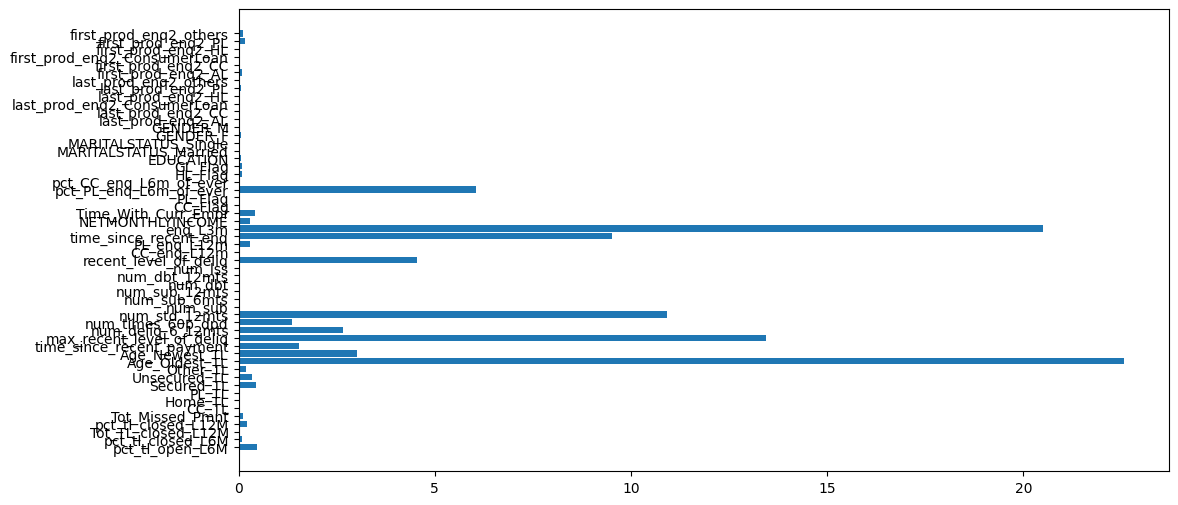

In [128]:
plt.figure(figsize=(12,6))
plt.barh(x_train.columns, feature_importances)
plt.show()


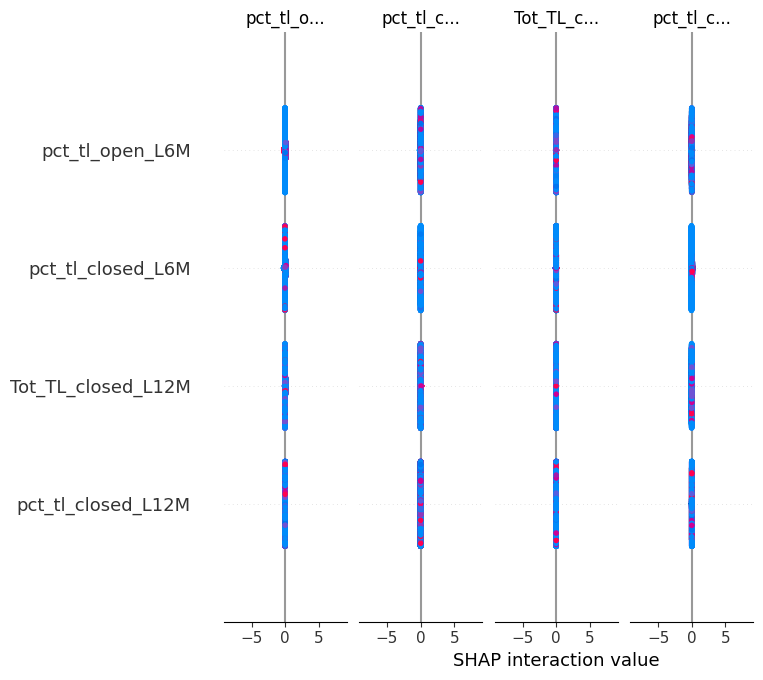

In [94]:
import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_test)
shap.summary_plot(shap_values, x_test)


In [1]:
import pickle
# Define the filename for the model
cat_boost = 'model.pkl'

# Use pickle to dump the trained model object into a file
with open(cat_boost, 'wb') as file:
    pickle.dump(model, file)

print(f"Model successfully saved as '{cat_boost}'")

NameError: name 'model' is not defined